# Project Description: Twitter US Airline Sentiment
## Data Description:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Dataset:
The project is from a dataset from Kaggle.Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentimentThe . <br>
The dataset has the following columns: tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, user_timezone

## Objective:
To implement NLP on review text and classify it to positive, neutral, and negative tweets

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import re
from bs4 import BeautifulSoup

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
data = pd.read_csv("Tweets.csv")

In [4]:
data.shape

(14640, 15)

In [5]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### comments:

* there are missing data in multiple columns but for this project we only care about the text and airline_sentiment columns which do not have any missing values so we can drop other columns

In [8]:
data=data.drop(data.columns.difference(['text','airline_sentiment']), axis=1)

In [9]:
print(data.columns)

Index(['airline_sentiment', 'text'], dtype='object')


In [10]:
data.shape

(14640, 2)

In [11]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [12]:
def tweet_to_words(raw_review):
    '''
    Function to convert a raw review to a string of words
    the input is a single string (a raw airline review), and
    the output is a single string (a preprocessed airline review)
    it includes the following steps:
    1) removing html tags
    2) removing special characters and numbers
    3) converting to lower case and tokenization
    4) removing the stopwords
    5) Lemmatization
    6) joining the words back into one string separated by space
    '''
    # 1) removing html tags
    review_text=BeautifulSoup(raw_review, 'html.parser').get_text()
    
    # 2) removing special characters, punctuations and numbers
    review_text=re.sub(pattern=r'[^a-zA-Z\s]', repl='', string=review_text)
    
    # 3) converting to lower case and tokenization    
    words=word_tokenize(review_text.lower())
    
    # 4) removing the stopwords
    stopwords_list=stopwords.words('english')  
    words=list(filter(lambda x: x not in stopwords_list, words))
    
    # 5) Lemmatizing the words    
    lemmatizer=WordNetLemmatizer()
    words=list(map(lambda x: lemmatizer.lemmatize(x, pos='v'), words))
    
    # 6) joining the words in the list
    review_text=' '.join(words)
    
    return review_text    

In [13]:
processed_data=data.copy()
processed_data['text']=processed_data['text'].apply(tweet_to_words)

In [14]:
processed_data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus youve add commercials exper...
2,neutral,virginamerica didnt today must mean need take ...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [15]:
# Vectorization (Converting the text data to numbers).
# two methods were used count_vectorization and TfIdf-vectorization

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(max_features=1200)                # Keep only 1200 features to make the computation faster
tfidf_vectorizer = TfidfVectorizer(max_features=1200)

data_features_count = vectorizer.fit_transform(processed_data['text']).toarray()
data_features_tfidf = tfidf_vectorizer.fit_transform(processed_data['text']).toarray()

In [16]:
data_features_count.shape

(14640, 1200)

In [17]:
data_features_tfidf.shape

(14640, 1200)

In [18]:
cv_score=[]
train_score=[]
test_score=[]

## ML model using CountVectorizer

In [19]:
# Spliting the data into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_features_count, processed_data['airline_sentiment'], test_size=0.25, random_state=0)

In [20]:
# Using Random Forest classifier and calculating the cross validation score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=50, n_jobs=4)
score=cross_val_score(clf, data_features_count, processed_data['airline_sentiment'], cv=10).mean()
cv_score.append(score)
print(score)

0.7198770491803278


In [21]:
# training and testing the Random Forest classifier using the splitted data sets:
clf.fit(x_train, y_train)
train_score.append(clf.score(x_train, y_train))
test_score.append(clf.score(x_test, y_test))
print(f"model accuracy on training data: {clf.score(x_train, y_train):.3f}")
print(f"model accuracy on test data: {clf.score(x_test, y_test):.3f}")

model accuracy on training data: 0.991
model accuracy on test data: 0.748


[[2043  205   79]
 [ 310  369   93]
 [ 134  101  326]]


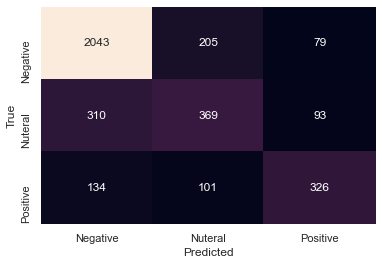

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_count=clf.predict(x_test)
cm=confusion_matrix(y_test, y_pred_count)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=['Negative', 'Nuteral', 'Positive'], yticklabels=['Negative', 'Nuteral', 'Positive'])
plt.gca().set_xlabel('Predicted')
plt.gca().set_ylabel('True');

In [23]:
print(' '.rjust(15,'=')+'Classification report for ML model based on CountVectorization'+' '.ljust(15,'='))
print(classification_report(y_test, y_pred_count))

============== Classification report for ML model based on CountVectorization ==============
              precision    recall  f1-score   support

    negative       0.82      0.88      0.85      2327
     neutral       0.55      0.48      0.51       772
    positive       0.65      0.58      0.62       561

    accuracy                           0.75      3660
   macro avg       0.67      0.65      0.66      3660
weighted avg       0.74      0.75      0.74      3660



## ML model using TfIdfVectorizer

In [24]:
# Spliting the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(data_features_tfidf, processed_data['airline_sentiment'], test_size=0.25, random_state=0)

In [25]:
# Using Random Forest classifier and calculating the cross validation score for TfIDFVectorizer

clf = RandomForestClassifier(n_estimators=50, n_jobs=4)
score=cross_val_score(clf, data_features_tfidf, processed_data['airline_sentiment'], cv=10).mean()
cv_score.append(score)
print(score)

0.7134562841530055


In [26]:
# training and testing the Random Forest classifier using the splitted data sets:
clf.fit(x_train, y_train)
train_score.append(clf.score(x_train, y_train))
test_score.append(clf.score(x_test, y_test))
print(f"model accuracy on training data: {clf.score(x_train, y_train):.3f}")
print(f"model accuracy on test data: {clf.score(x_test, y_test):.3f}")

model accuracy on training data: 0.991
model accuracy on test data: 0.755


[[2144  139   44]
 [ 389  328   55]
 [ 186   82  293]]


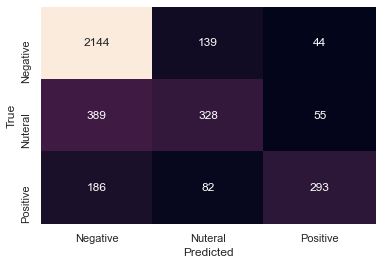

In [27]:
y_pred_tfidf=clf.predict(x_test)
cm=confusion_matrix(y_test, y_pred_tfidf)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=['Negative', 'Nuteral', 'Positive'], yticklabels=['Negative', 'Nuteral', 'Positive'])
plt.gca().set_xlabel('Predicted')
plt.gca().set_ylabel('True');

In [28]:
print(' '.rjust(15,'=')+'Classification report for ML model based on TfIdfVectorization'+' '.ljust(15,'='))
print(classification_report(y_test, y_pred_tfidf))

============== Classification report for ML model based on TfIdfVectorization ==============
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      2327
     neutral       0.60      0.42      0.50       772
    positive       0.75      0.52      0.61       561

    accuracy                           0.76      3660
   macro avg       0.71      0.62      0.65      3660
weighted avg       0.74      0.76      0.74      3660



## Summary:

In [29]:
result_comparison=pd.DataFrame({
    'Vectorizer': ['Count Vectorizer', 'Tf-Idf Vectorizer'],
    'CV score': cv_score,
    'train score': train_score,
    'test score': test_score
})

result_comparison

,Vectorizer,CV score,train score,test score
0,Count Vectorizer,0.719877,0.991075,0.748087
1,Tf-Idf Vectorizer,0.713456,0.991075,0.755464


### comments
* Dataset included tweets about different airlines in text format and their sentiment score of negative, neutral and positive sentiments.
* The objective was to build a model to classify tweets to negative, neutral and positive.
* the data was pre-processed first using variuos techniques and libraries including removing html tags, removing special characters and numbers, convertying to lower case, tokenization, removing stopwords, and lemmitization.
* The pre-precessed data is converted to numbers using two methods: countvectorizer and tfidfvectorizer, so that we can feed the data in the model.
* After building the Random Forest classification model, the model was evaluated using cross-validation and test data. Then  the result for the test data was predicted and used to create confusion matrix and classification report.
* After that it was shown that the performance of the classifier is almost the same using different vectorization techniques.
* To increase accuracy, we can use different Pre-processing techniques, different classifier, or perform feature engineering (grid search or random search) to tune the model hyper-parameters.
* the Random Forest classifier seems overfitted we need to find the best hyper-parameter to reduce the variance

## Bonus: using ANN and tensorflow

In [30]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [31]:
# Preparing data for Neural Network model

scaler=StandardScaler()
xtrain=scaler.fit_transform(x_train)
xtest=scaler.transform(x_test)

ytrain=y_train.replace({'negative':0, 'neutral':1, 'positive':2})
ytest=y_test.replace({'negative':0, 'neutral':1, 'positive':2})

ytrain=to_categorical(ytrain, 3)
ytest=to_categorical(ytest, 3)

In [32]:
model=Sequential()
model.add(Dense(1200, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01),
                bias_regularizer=regularizers.l2(1e-3),
                activity_regularizer=regularizers.l2(1e-3)))
model.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(1e-2), 
                bias_regularizer=regularizers.l2(1e-3),
                activity_regularizer=regularizers.l2(1e-3)))
model.add(Dense(3, activation='softmax'))

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [34]:
history=model.fit(xtrain, ytrain, batch_size=500, epochs=250, verbose=True, validation_split=0.2)

Epoch 1/250
18/18 [==============================] - 2s 70ms/step - loss: 54.4265 - accuracy: 0.5055 - val_loss: 53.7958 - val_accuracy: 0.5956
Epoch 2/250
18/18 [==============================] - 0s 22ms/step - loss: 53.6217 - accuracy: 0.6043 - val_loss: 53.0847 - val_accuracy: 0.6120
Epoch 3/250
18/18 [==============================] - 0s 23ms/step - loss: 52.8933 - accuracy: 0.6275 - val_loss: 52.3927 - val_accuracy: 0.6243
Epoch 4/250
18/18 [==============================] - 0s 23ms/step - loss: 52.1983 - accuracy: 0.6465 - val_loss: 51.7160 - val_accuracy: 0.6375
Epoch 5/250
18/18 [==============================] - 0s 22ms/step - loss: 51.5095 - accuracy: 0.6547 - val_loss: 51.0504 - val_accuracy: 0.6494
Epoch 6/250
18/18 [==============================] - 0s 23ms/step - loss: 50.8506 - accuracy: 0.6700 - val_loss: 50.3966 - val_accuracy: 0.6594
Epoch 7/250
18/18 [==============================] - 0s 22ms/step - loss: 50.1713 - accuracy: 0.6917 - val_loss: 49.7500 - val_accuracy:

18/18 [==============================] - 0s 23ms/step - loss: 9.0451 - accuracy: 0.9416 - val_loss: 9.2232 - val_accuracy: 0.7823
Epoch 114/250
18/18 [==============================] - 0s 24ms/step - loss: 8.8622 - accuracy: 0.9389 - val_loss: 9.0357 - val_accuracy: 0.7819
Epoch 115/250
18/18 [==============================] - 0s 24ms/step - loss: 8.6694 - accuracy: 0.9410 - val_loss: 8.8516 - val_accuracy: 0.7819
Epoch 116/250
18/18 [==============================] - 0s 22ms/step - loss: 8.4956 - accuracy: 0.9367 - val_loss: 8.6706 - val_accuracy: 0.7814
Epoch 117/250
18/18 [==============================] - 0s 22ms/step - loss: 8.3154 - accuracy: 0.9385 - val_loss: 8.4916 - val_accuracy: 0.7810
Epoch 118/250
18/18 [==============================] - 0s 22ms/step - loss: 8.1414 - accuracy: 0.9344 - val_loss: 8.3161 - val_accuracy: 0.7814
Epoch 119/250
18/18 [==============================] - 0s 22ms/step - loss: 7.9624 - accuracy: 0.9329 - val_loss: 8.1434 - val_accuracy: 0.7828
Epoch 

Epoch 170/250
18/18 [==============================] - 0s 22ms/step - loss: 2.5481 - accuracy: 0.9015 - val_loss: 2.7128 - val_accuracy: 0.7819
Epoch 171/250
18/18 [==============================] - 0s 23ms/step - loss: 2.4986 - accuracy: 0.9009 - val_loss: 2.6644 - val_accuracy: 0.7801
Epoch 172/250
18/18 [==============================] - 0s 23ms/step - loss: 2.4592 - accuracy: 0.8950 - val_loss: 2.6207 - val_accuracy: 0.7842
Epoch 173/250
18/18 [==============================] - 0s 22ms/step - loss: 2.4112 - accuracy: 0.8988 - val_loss: 2.5769 - val_accuracy: 0.7851
Epoch 174/250
18/18 [==============================] - 0s 23ms/step - loss: 2.3706 - accuracy: 0.8990 - val_loss: 2.5356 - val_accuracy: 0.7842
Epoch 175/250
18/18 [==============================] - 0s 22ms/step - loss: 2.3358 - accuracy: 0.8947 - val_loss: 2.4945 - val_accuracy: 0.7846
Epoch 176/250
18/18 [==============================] - 0s 23ms/step - loss: 2.3007 - accuracy: 0.8891 - val_loss: 2.4574 - val_accuracy:

Epoch 227/250
18/18 [==============================] - 0s 23ms/step - loss: 1.5287 - accuracy: 0.8952 - val_loss: 1.7274 - val_accuracy: 0.7851
Epoch 228/250
18/18 [==============================] - 0s 22ms/step - loss: 1.5226 - accuracy: 0.8941 - val_loss: 1.7197 - val_accuracy: 0.7855
Epoch 229/250
18/18 [==============================] - 0s 23ms/step - loss: 1.5022 - accuracy: 0.9013 - val_loss: 1.7128 - val_accuracy: 0.7832
Epoch 230/250
18/18 [==============================] - 0s 22ms/step - loss: 1.4987 - accuracy: 0.9017 - val_loss: 1.7064 - val_accuracy: 0.7855
Epoch 231/250
18/18 [==============================] - 0s 22ms/step - loss: 1.4946 - accuracy: 0.8991 - val_loss: 1.6990 - val_accuracy: 0.7842
Epoch 232/250
18/18 [==============================] - 0s 22ms/step - loss: 1.4887 - accuracy: 0.8974 - val_loss: 1.6947 - val_accuracy: 0.7805
Epoch 233/250
18/18 [==============================] - 0s 24ms/step - loss: 1.4799 - accuracy: 0.8969 - val_loss: 1.6835 - val_accuracy:

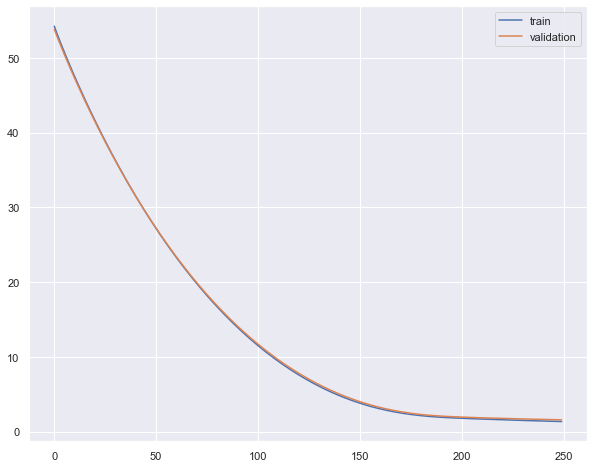

In [35]:
hist=history.history
f,ax=plt.subplots(figsize=(10,8))
ax.plot(hist['loss'], label='train')
ax.plot(hist['val_loss'], label='validation')
ax.legend();

In [36]:
loss, acc = model.evaluate(xtest, ytest, verbose=False)
print(f'The accuracy on test data: {acc:.3f}')

The accuracy on test data: 0.780


In [37]:
y_pred_ANN=model.predict(xtest).argmax(axis=1)

[[2079  185   63]
 [ 292  418   62]
 [ 117   88  356]]


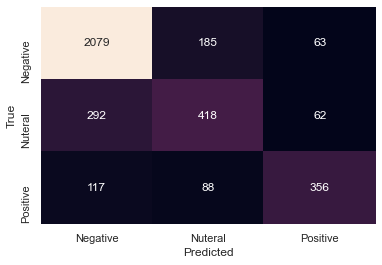

In [38]:
cm=confusion_matrix(y_test.replace({'negative':0, 'neutral':1, 'positive':2}), y_pred_ANN)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=['Negative', 'Nuteral', 'Positive'], yticklabels=['Negative', 'Nuteral', 'Positive'])
plt.gca().set_xlabel('Predicted')
plt.gca().set_ylabel('True');

In [39]:
print(' '.rjust(15,'=')+'Classification report for ML model based on TfIdfVectorization'+' '.ljust(15,'='))
print(classification_report(y_test.replace({'negative':0, 'neutral':1, 'positive':2}), y_pred_ANN))

============== Classification report for ML model based on TfIdfVectorization ==============
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2327
           1       0.60      0.54      0.57       772
           2       0.74      0.63      0.68       561

    accuracy                           0.78      3660
   macro avg       0.73      0.69      0.71      3660
weighted avg       0.77      0.78      0.77      3660



### Comments:

The ANN also seems overfitted even after adding regularization. The accuracy on the test data is slightly better than the Random Forest classifier. We need to tune the hyper-pramaters of both models to improve their performance though.

In [40]:
clf.feature_importances_

array([0.00162794, 0.00132677, 0.00021483, ..., 0.00033856, 0.00017346,
       0.0001386 ])